## Final Project Submission

Please fill out:
* Student name: Nastaran Nazemian
* Student pace: part time
* Scheduled project review date/time: 06/15/2020 at 11:00 AM PST
* Instructor name: Eli Thomas
* Blog post URL:


In [ ]:
import json
import pandas as pd
import numpy as np
import datetime
import math
import statistics as stat
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
plt.style.use('seaborn')
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv('data_06132020.csv')
df.shape

(18983, 36)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,has_basement,is_renovated,log_price,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_basement,log_sqft_living15,log_sqft_lot15,log_age
0,7129300520,2014-10-13,221900.0,3,1,1180.0,5650.0,1,0,0,...,0,0,12.309982,7.073270,8.639411,7.073270,1.176378e-311,7.200425,8.639411,4.077537
1,6414100192,2014-12-09,538000.0,3,2,2570.0,7242.0,2,0,0,...,1,1,13.195614,7.851661,8.887653,7.682482,5.991465e+00,7.432484,8.941022,4.143135
2,5631500400,2015-02-25,180000.0,2,1,770.0,10000.0,1,0,0,...,0,0,12.100712,6.646391,9.210340,6.646391,6.646391e+00,7.908387,8.994917,4.406719
3,2487200875,2014-12-09,604000.0,4,3,1960.0,5000.0,1,0,0,...,1,0,13.311329,7.580700,8.517193,6.956545,6.813445e+00,7.215240,8.517193,3.891820
4,1954400510,2015-02-18,510000.0,3,2,1680.0,8080.0,1,0,0,...,0,0,13.142166,7.426549,8.997147,7.426549,7.426549e+00,7.495542,8.923058,3.332205


In [4]:
df.age.isna().sum()

0

In [5]:
cate_data = df.loc[:, (df.nunique()<=30)]

In [6]:
cate_data.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'year_sold', 'month_sold', 'has_basement', 'is_renovated'],
      dtype='object')

In [7]:
len(set(df.city))

37

In [8]:
cont_variables = ['price','sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age']
log_cont_variables = ['log_price','log_sqft_living', 'log_sqft_above',
                  'log_sqft_basement', 'log_sqft_living15', 'log_sqft_lot15']


In [9]:
corr = round(df[cont_variables].corr(),2)
corr

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
price,1.00,0.67,0.11,0.56,0.33,0.57,0.08,-0.03
sqft_living,0.67,1.00,0.26,0.86,0.44,0.76,0.18,-0.32
sqft_lot,0.11,0.26,1.00,0.22,0.13,0.30,0.71,0.03
sqft_above,0.56,0.86,0.22,1.00,-0.08,0.73,0.16,-0.44
sqft_basement,0.33,0.44,0.13,-0.08,1.00,0.19,0.08,0.15
sqft_living15,0.57,0.76,0.30,0.73,0.19,1.00,0.25,-0.33
sqft_lot15,0.08,0.18,0.71,0.16,0.08,0.25,1.00,0.01
age,-0.03,-0.32,0.03,-0.44,0.15,-0.33,0.01,1.00


In [10]:
abs(corr) > 0.6

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
price,True,True,False,False,False,False,False,False
sqft_living,True,True,False,True,False,True,False,False
sqft_lot,False,False,True,False,False,False,True,False
sqft_above,False,True,False,True,False,True,False,False
sqft_basement,False,False,False,False,True,False,False,False
sqft_living15,False,True,False,True,False,True,False,False
sqft_lot15,False,False,True,False,False,False,True,False
age,False,False,False,False,False,False,False,True


collinear variables: sqft_living15, sqft_above
No relation:yr_renovated,yr_built, sqft_lot15, sqft_basement


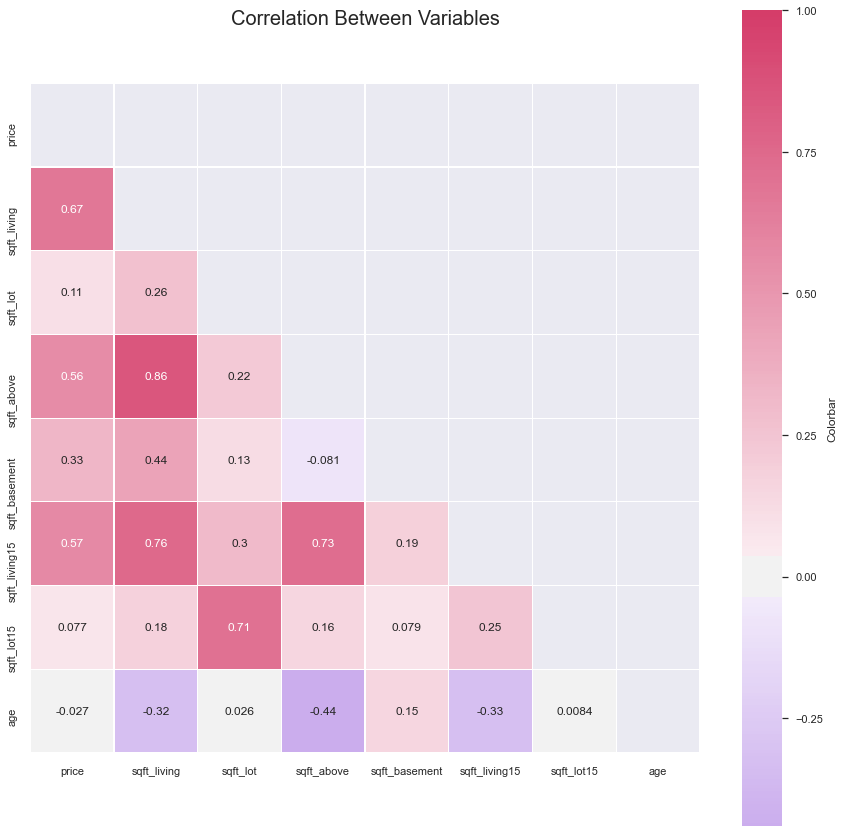

In [11]:
f, ax = plt.subplots(figsize=(15,15))
corr = df[cont_variables].corr()
sns.set(font_scale=1)
cmap = sns.diverging_palette(1000, 0, as_cmap=True)
matrix = np.triu(corr)
ax.set_title('Correlation Between Variables', y=1.2, fontsize=16, ha='center').set_position([0.5,1.08])
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.2, ax=ax, annot=True, mask=matrix, 
            cbar_kws={'label': 'Colorbar'})
plt.title('Correlation Between Variables', fontsize=20, ha='center')
plt.show()

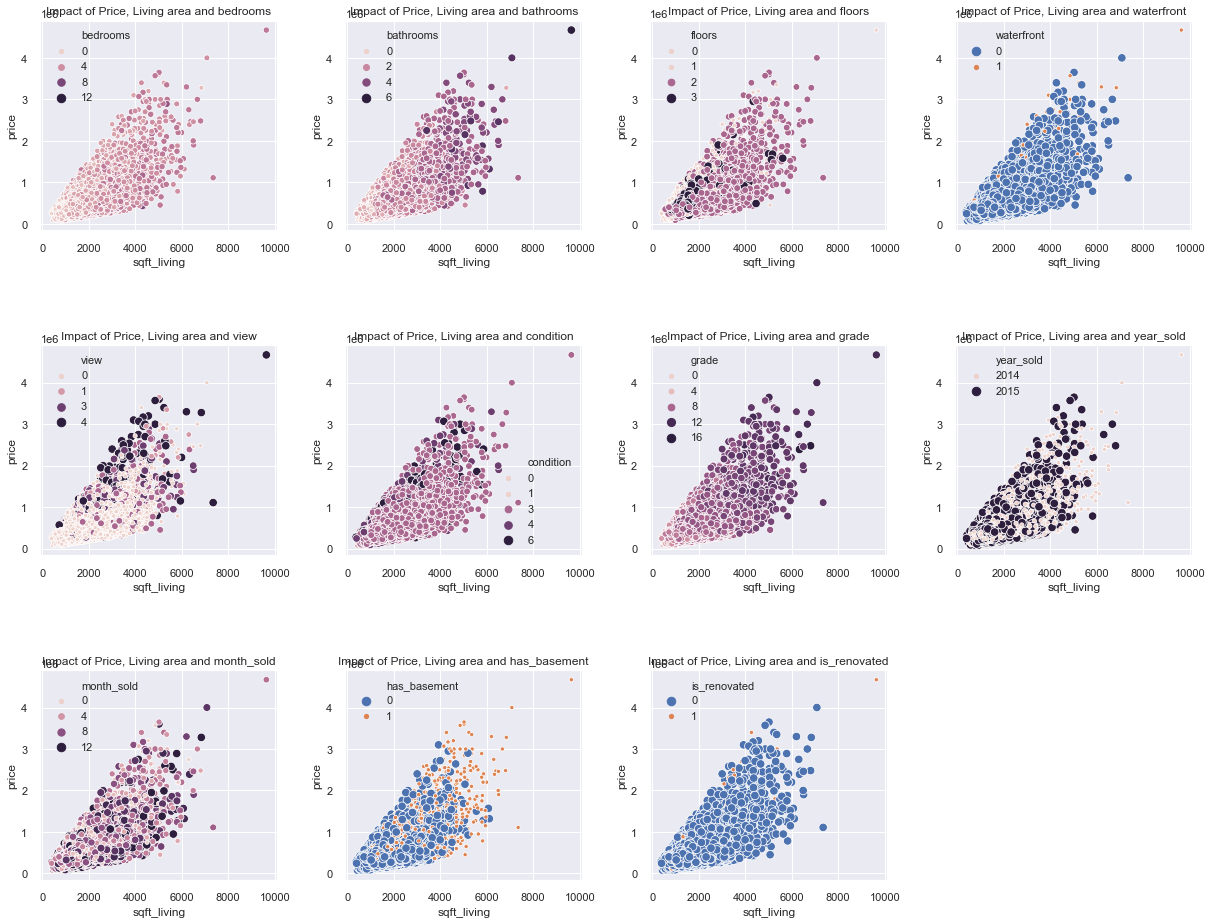

In [12]:
plt.figure(figsize=(17,17), facecolor='white')
plot_number = 1
for col in cate_data.columns:
    ax = plt.subplot(4, 4, plot_number)
    sns.scatterplot(df.sqft_living, df.price, hue=df[col], size = df[col])
    ax.set_title('Impact of Price, Living area and {0}'.format(col))
    plot_number = plot_number + 1
plt.tight_layout()
plt.subplots_adjust(hspace=0.55)
plt.show()


In [13]:
df = df.loc[(df.price < 4000000)]
df = df.loc[(df.sqft_living < 6000)]
len(df)

18968

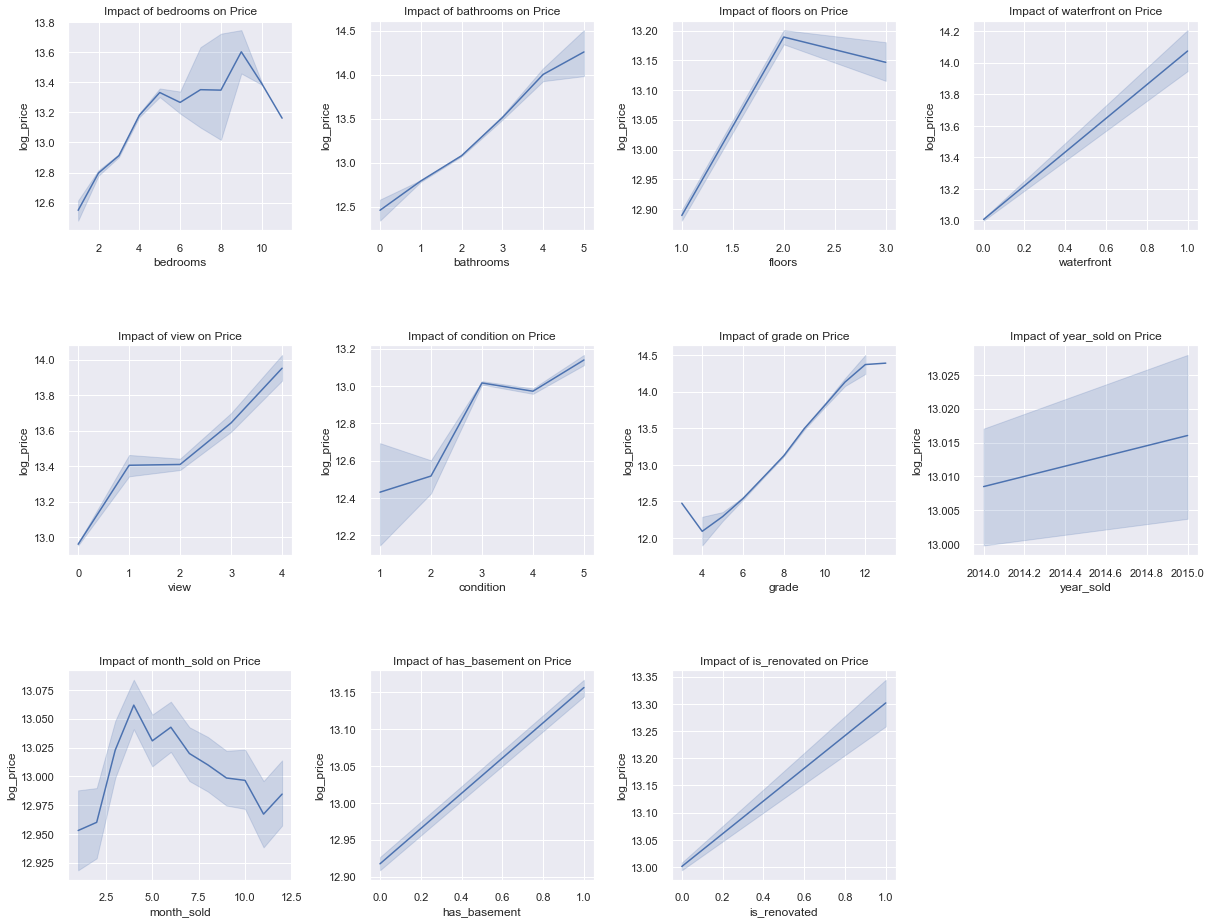

In [14]:
plt.figure(figsize=(17,17), facecolor='white')
plot_number = 1
for col in cate_data.columns:
    ax = plt.subplot(4, 4, plot_number)
    sns.lineplot(df[col], df.log_price)
    ax.set_title('Impact of {0} on Price'.format(col))
    plot_number = plot_number + 1
plt.tight_layout()
plt.subplots_adjust(hspace=0.55)
plt.show()

Text(0.5, 1.0, 'Impact of Age on Price')

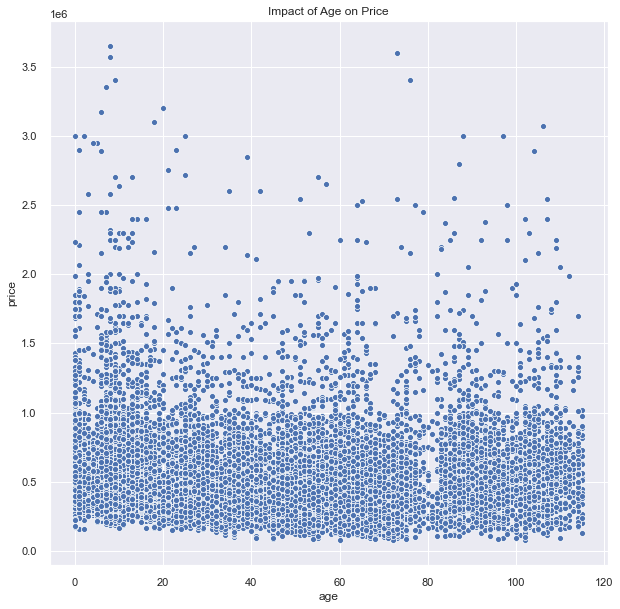

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.age, df.price)
plt.title('Impact of Age on Price')

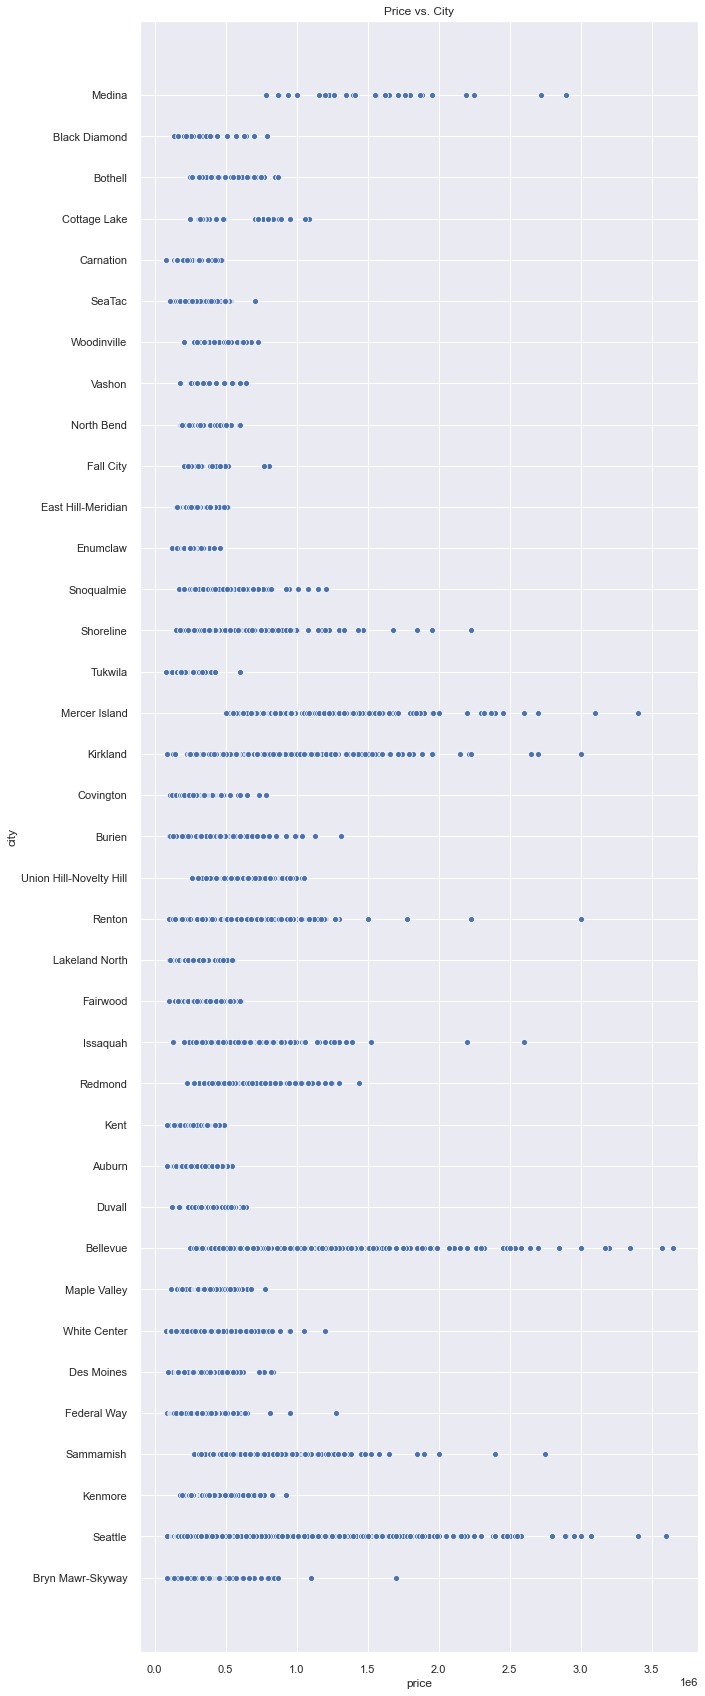

In [16]:
plt.figure(figsize=(10,30))
sns.scatterplot(x=df.price, y=df.city,\
                data= df, palette='Set3', sizes=(15, 200),)
plt.title('Price vs. City')
plt.subplots_adjust(hspace=0.35)
plt.show()


In [17]:
city_price = df.groupby(['city','year_sold']).agg({'price': ['mean', 'min', 'max', 'count'],\
                                                   'age': ['mean', 'min', 'max', 'count']})

In [18]:
city_price

price                                   age  \
                                  mean       min        max count       mean   
city          year_sold                                                        
Auburn        2014       270581.341297   90000.0   511000.0   293  32.542662   
              2015       267654.082278   95000.0   545000.0   158  33.139241   
Bellevue      2014       786909.565324  248000.0  3170000.0   819  41.719170   
              2015       861856.567935  250000.0  3650000.0   368  43.407609   
Black Diamond 2014       317827.193548  135000.0   700000.0    31  44.645161   
...                                ...       ...        ...   ...        ...   
Vashon        2015       392250.000000  300000.0   495000.0     6  45.833333   
White Center  2014       334212.636364   82000.0  1200000.0   165  57.793939   
              2015       349851.851852   89950.0  1050000.0   108  59.314815   
Woodinville   2014       453204.606742  203700.0   730000.0    89  29.573034   
              2015       447860.584906  308000.0   680000.0    53  33.377358   

                                            
                          min    max count  
city          year_sold                     
Auburn        2014        0.0  104.0   293  
              2015        1.0  107.0   158  
Bellevue      2014        0.0   96.0   819  
              2015        1.0  101.0   368  
Black Diamond 2014        0.0  114.0    31  
...                       ...    ...   ...  
Vashon        2015       12.0  107.0     6  
White Center  2014        0.0  106.0   165  
              2015        1.0  100.0   108  
Woodinville   2014        0.0  101.0    89  
              2015        4.0   51.0    53  

[74 rows x 8 columns]

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price ~ C(city) + C(is_renovated)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq       df           F        PR(>F)
C(city)          5.388535e+14     36.0  225.703553  0.000000e+00
C(is_renovated)  1.426720e+13      1.0  215.133861  1.922095e-48
Residual         1.255395e+15  18930.0         NaN           NaN


In [20]:
from scipy.stats import f
import numpy_indexed as npi
# crosstab = pd.crosstab(df["region"], df["agecat"])
# scipy.stats.chi2_contingency(renovated_df, correction=False) 

renovated = df.price.loc[df.waterfront == 1]
not_renovated = df.price.loc[df.waterfront == 0]
print(stats.normaltest(renovated))
print(stats.normaltest(not_renovated))
import scipy.stats
levene_test =scipy.stats.levene(renovated,not_renovated)
levene_test

NormaltestResult(statistic=5.70878355560618, pvalue=0.05759083849695034)
NormaltestResult(statistic=10851.842048529461, pvalue=0.0)


LeveneResult(statistic=298.17085966170396, pvalue=2.650620085454552e-66)